In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import Image, display, HTML

In [3]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

/home/antonia/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [4]:
df = pd.read_csv('./data/data_w_genres.csv')
print(df.shape)
df.head()

(32539, 16)


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [5]:
# let's tokenize the genres into lists
def tokenize_str(text):
    regex_rule = re.compile("['\"\[\]]")
    text = re.sub(regex_rule, "", text)
    return text.split(",")

df['genres'] = df['genres'].apply(tokenize_str)
df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,[show tunes]
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [6]:
df[df['artists'] == 'Julieta Venegas']['genres']

14744    [latin,  latin alternative,  latin pop,  latin...
Name: genres, dtype: object

In [7]:
df_melted_genres = pd.DataFrame(
    {col:np.repeat(df[col].values, df['genres'].str.len()) for col in df.columns.drop('genres')}
).assign(
    **{'genre':np.concatenate(df['genres'].values)}
)

df_melted_genres[df_melted_genres['artists'] == 'Julieta Venegas']

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genre
34978,Julieta Venegas,0.146355,0.687455,211278.727273,0.654636,0.000022,0.140564,-6.600818,0.036509,111.885091,0.658636,65.363636,11,1,11,latin
34979,Julieta Venegas,0.146355,0.687455,211278.727273,0.654636,0.000022,0.140564,-6.600818,0.036509,111.885091,0.658636,65.363636,11,1,11,latin alternative
34980,Julieta Venegas,0.146355,0.687455,211278.727273,0.654636,0.000022,0.140564,-6.600818,0.036509,111.885091,0.658636,65.363636,11,1,11,latin pop
34981,Julieta Venegas,0.146355,0.687455,211278.727273,0.654636,0.000022,0.140564,-6.600818,0.036509,111.885091,0.658636,65.363636,11,1,11,latin rock
34982,Julieta Venegas,0.146355,0.687455,211278.727273,0.654636,0.000022,0.140564,-6.600818,0.036509,111.885091,0.658636,65.363636,11,1,11,rock en espanol


In [8]:
df_melted_genres[df_melted_genres['genre'] == ''].shape[0]

13563

In [9]:
df_melted_genres['genre'] = df_melted_genres['genre'].replace('', np.NaN)
df_melted_genres = df_melted_genres.dropna(thresh=df_melted_genres.columns.shape[0])
df_melted_genres = df_melted_genres.drop('count', axis=1)
df_melted_genres

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,genre
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,show tunes
8,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,comedy rock
9,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,comic
10,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,parody
12,$NOT,0.458167,0.826667,146886.333333,0.518667,0.000007,0.201683,-8.713167,0.272550,90.728833,0.426750,74.166667,0,1,florida rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77454,黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,34.000000,11,1,chinese indie rock
77455,龔詩嘉,0.134000,0.450000,184120.000000,0.782000,0.000000,0.063200,-5.905000,0.030600,87.980000,0.475000,17.000000,0,1,singaporean mandopop
77456,龔詩嘉,0.134000,0.450000,184120.000000,0.782000,0.000000,0.063200,-5.905000,0.030600,87.980000,0.475000,17.000000,0,1,singaporean pop
77457,김수철,0.509000,0.456000,189245.000000,0.321000,0.000001,0.156000,-16.682000,0.031400,79.114000,0.210000,24.000000,4,0,classic korean pop


In [10]:
categorical_variables = ['key', 'mode']

In [11]:
def mean_or_median(sr):
    is_categorical = sr.name in categorical_variables
    m = 0
    if is_categorical:
        m = sr.median()
    else:
        m = sr.mean()
    return m

In [12]:
df_melted_genres = df_melted_genres.groupby(by='genre').aggregate(mean_or_median).reset_index()
df_melted_genres

,genre,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,accordion,0.323000,0.588000,164000.000000,0.392000,0.441000,0.079400,-14.899000,0.072700,109.131000,0.709000,38.000000,2.0,0.0
1,adult standards,0.416978,0.544870,178639.814815,0.609150,0.002897,0.305269,-8.243630,0.125515,119.120370,0.539204,29.092593,0.0,1.0
2,afghan traditional,0.894000,0.309000,331186.000000,0.366000,0.006120,0.159000,-15.610000,0.036500,95.666000,0.657000,15.000000,1.0,1.0
3,african rock,0.129830,0.584833,221539.416667,0.460750,0.187444,0.110992,-10.811833,0.043300,117.637167,0.524167,33.583333,8.0,1.0
4,african-american classical,0.414632,0.609722,220623.468577,0.434471,0.163028,0.158629,-11.126701,0.100846,118.151000,0.300346,36.741220,7.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,zen,0.731541,0.582067,191949.600000,0.133277,0.687073,0.135493,-17.254467,0.061507,94.686400,0.346680,0.000000,1.0,1.0
4821,zolo,0.245000,0.340000,161557.000000,0.668000,0.000580,0.414000,-9.539000,0.041050,141.195000,0.602500,15.500000,8.0,1.0
4822,zouk,0.149483,0.750667,234111.333333,0.662333,0.001681,0.058633,-10.360667,0.034733,118.998667,0.967333,57.666667,5.0,1.0
4823,zurich indie,0.993000,0.705667,198417.333333,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7.0,0.0


In [13]:
# normalize variables
from sklearn.preprocessing import StandardScaler

X = df_melted_genres.drop(['genre'], axis=1)
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

Text(0.5, 1.0, 'MSE for every K tried')

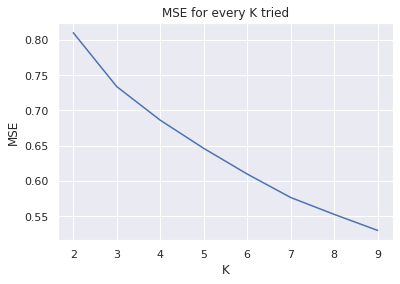

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

#X = df_melted_genres.drop('genre', axis=1)

mses_per_k = []
K_to_try = np.arange(2, 10)

for k in K_to_try:
    means = KMeans(k)
    predictions = means.fit_predict(X)
    mses = []
    for i in range(len(predictions)):
        cluster_center = means.cluster_centers_[predictions[i]]
        point = X[i]
        mses.append(mean_squared_error(cluster_center, point))
    
    mses_per_k.append(np.mean(mses))

plt.plot(K_to_try, mses_per_k)
plt.ylabel('MSE')
plt.xlabel('K')
plt.title('MSE for every K tried')

In [15]:
k_means = KMeans(5)
predictions = k_means.fit_predict(X)


In [16]:
df_melted_genres['cluster'] = pd.Series(k_means.labels_)
df_melted_genres

,genre,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,cluster
0,accordion,0.323000,0.588000,164000.000000,0.392000,0.441000,0.079400,-14.899000,0.072700,109.131000,0.709000,38.000000,2.0,0.0,0
1,adult standards,0.416978,0.544870,178639.814815,0.609150,0.002897,0.305269,-8.243630,0.125515,119.120370,0.539204,29.092593,0.0,1.0,3
2,afghan traditional,0.894000,0.309000,331186.000000,0.366000,0.006120,0.159000,-15.610000,0.036500,95.666000,0.657000,15.000000,1.0,1.0,0
3,african rock,0.129830,0.584833,221539.416667,0.460750,0.187444,0.110992,-10.811833,0.043300,117.637167,0.524167,33.583333,8.0,1.0,3
4,african-american classical,0.414632,0.609722,220623.468577,0.434471,0.163028,0.158629,-11.126701,0.100846,118.151000,0.300346,36.741220,7.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,zen,0.731541,0.582067,191949.600000,0.133277,0.687073,0.135493,-17.254467,0.061507,94.686400,0.346680,0.000000,1.0,1.0,2
4821,zolo,0.245000,0.340000,161557.000000,0.668000,0.000580,0.414000,-9.539000,0.041050,141.195000,0.602500,15.500000,8.0,1.0,3
4822,zouk,0.149483,0.750667,234111.333333,0.662333,0.001681,0.058633,-10.360667,0.034733,118.998667,0.967333,57.666667,5.0,1.0,3
4823,zurich indie,0.993000,0.705667,198417.333333,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7.0,0.0,0


In [17]:
df_melted_genres['cluster'] = df_melted_genres['cluster'].map({0:'cl_one', 1:'cl_two', 2:'cl_three', 3:'cl_four', 4:'cl_five'})

In [18]:
import plotly.express as px

spotify_colors = ['#19E68C', '#F037A5', '#9003fc', '#FAE62D', '#509BF5']

@interact
def clusters_plot(x=list(df_melted_genres.drop(['genre','cluster'], axis=1).columns), 
                  y=list(df_melted_genres.drop(['genre', 'cluster'], axis=1).columns)):

    fig = px.scatter(df_melted_genres, x=x, y=y, color='cluster', 
                     template='plotly_white', color_discrete_sequence=spotify_colors)
    
    fig.update_traces(marker=dict(size=3))
    fig.show()

interactive(children=(Dropdown(description='x', options=('acousticness', 'danceability', 'duration_ms', 'energ…

In [19]:
df_melted_genres[df_melted_genres['cluster'] == 'cl_five']['genre']

107                 barnsagor
295           childrens story
401                    comedy
507               deep comedy
931                 hoerspiel
951            hungarian folk
1201         kleine hoerspiel
1242            latino comedy
1285       magyar alternative
1431               motivation
1518               new comedy
1651                  oratory
1715                   poetry
1754              pop urbaine
1881                  reading
2041            sesame street
2756              barnemusikk
2757                barnmusik
2758                barnsagor
2783              beat poetry
2821             black comedy
2953          canadian comedy
2977                candomble
3057                 chip hop
3100    classic hungarian pop
3159             clean comedy
3170                   comedy
3380                    drama
3414        early avant garde
3531       folklore quebecois
3611        german literature
3632     ghanaian traditional
3634               ghettotech
3649      